In [3]:
##Estimación de indicadores de seguridad
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()

Loading required package: pacman



In [2]:
#carpetas <- read_csv('https://archivo.datos.cdmx.gob.mx/FGJ/carpetas/carpetasFGJ_acumulado_2024_09.csv')%>%
 carpetas <- read_csv('https://archivo.datos.cdmx.gob.mx/FGJ/carpetas/carpetasFGJ_acumulado_2025_01.csv')%>%
  filter(alcaldia_hecho != 'FUERA DE CDMX',
         anio_hecho %in% c(2016:2024))%>%
#Identificadores de categorías de delitos

mutate(
    #3 delitos de menor cifra negra: robo a casa, robo de vehículo y homicidio doloso
    III_delitos = case_when(categoria_delito %in% c('ROBO A CASA HABITACION CON VIOLENCIA','ROBO A CASA HABITACION SIN VIOLENCIA','ROBO DE VEHICULO CON Y SIN VIOLENCIA','HOMICIDIO DOLOSO') ~ 1,
    TRUE ~ 0),
#5 delitos de indicador propuesto en un momento
    V_delitos = case_when(categoria_delito %in% c('HOMICIDIO DOLOSO','ROBO A NEGOCIO CON VIOLENCIA','ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA','ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA','ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA','ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA','ROBO DE VEHÍCULO CON Y SIN VIOLENCIA') ~ 1,
    TRUE ~ 0),
#Delitos de alto impacto
    alto_impacto = case_when(categoria_delito %in% c('ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
                                                     'HOMICIDIO DOLOSO',
                                                     'ROBO DE VEHICULO CON Y SIN VIOLENCIA',
                                                     'ROBO A NEGOCIO CON VIOLENCIA',
                                                      'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
                                                     'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
                                                     'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
                                                     'VIOLACIÓN',
                                                     'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
                                                     'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
                                                     'ROBO A CASA HABITACIÓN CON VIOLENCIA',
                                                     'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
                                                     'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
                                                        'SECUESTRO') ~ 1,
                            TRUE ~ 0),
##Delitos con perspectiva de género
    perspectiva_genero = case_when(delito %in% c('ABUSO SEXUAL',
                                                 'ACOSO SEXUAL',
                                                 'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES',
                                                 'CONTRA LA INTIMIDAD SEXUAL',
                                                 'FEMINICIDIO',
                                                 'FEMINICIDIO POR ARMA BLANCA',
                                                 'FEMINICIDIO POR DISPARO DE ARMA DE FUEGO',
                                                 'FEMINICIO POR GOLPES',
                                                 'HOMICIDIO POR ARMA BLANCA',
                                                 'HOMICIDIO POR ARMA DE FUEGO',
                                                 'HOMICIDIO POR GOLPES',
                                                 'HOMICIDIOS INTENCIONALES (OTROS)',
                                                 'LESIONES INTENCIONALES',
                                                 'LESIONES INTENCIONALES POR ARMA BLANCA',
                                                 'LESIONES INTENCIONALES POR ARMA DE FUEGO',
                                                  'LESIONES INTENCIONALES POR GOLPES',
                                                 'PLAGIO O SECUESTRO',
                                                 'TRATA DE PERSONAS',
                                                 'VIOLACION',
                                                 'VIOLACION EQUIPARADA',
                                                 'VIOLACION EQUIPARADA POR CONOCIDO',
                                                 'VIOLACION TUMULTUARIA',
                                                 'VIOLENCIA FAMILIAR') ~ 1,
                            TRUE ~ 0)
)

Rows: 2098743 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (15): mes_inicio, hora_inicio, mes_hecho, hora_hecho, delito, categoria...
dbl   (4): anio_inicio, anio_hecho, latitud, longitud
dttm  (2): fecha_inicio, fecha_hecho

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(carpetas)

anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,⋯,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud,III_delitos,V_delitos,alto_impacto,perspectiva_genero
<dbl>,<chr>,<dttm>,<chr>,<dbl>,<chr>,<dttm>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,00:20:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,⋯,Barrio San Antonio Culhuacan,IZTAPALAPA,NA,CDMX,19.34080,-99.11431,0,1,1,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,01:45:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION,DELITO DE BAJO IMPACTO,⋯,Cerro De La Estrella,IZTAPALAPA,NA,CDMX,19.31861,-99.07572,0,0,0,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,01:15:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,⋯,Nextitla,MIGUEL HIDALGO,NA,CDMX,19.45716,-99.17253,0,0,0,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,01:30:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,⋯,Los Cedros,COYOACAN,NA,CDMX,19.31267,-99.11181,0,0,0,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,02:00:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO,DELITO DE BAJO IMPACTO,⋯,Pueblo Santa Maria Malinalco,AZCAPOTZALCO,NA,CDMX,19.47936,-99.17994,0,0,0,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,04:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,⋯,NA,VENUSTIANO CARRANZA,NA,CDMX,NA,NA,0,0,0,0


In [4]:
print(unique(carpetas$alcaldia_hecho))
print(unique(carpetas$categoria_delito))

 [1] "IZTAPALAPA"             "MIGUEL HIDALGO"         "COYOACAN"              
 [4] "AZCAPOTZALCO"           "VENUSTIANO CARRANZA"    "IZTACALCO"             
 [7] "ALVARO OBREGON"         "CUAUHTEMOC"             "BENITO JUAREZ"         
[10] "GUSTAVO A. MADERO"      "TLALPAN"                "nan"                   
[13] "TLAHUAC"                "MILPA ALTA"             "CUAJIMALPA DE MORELOS" 
[16] "XOCHIMILCO"             "LA MAGDALENA CONTRERAS" "CDMX (indeterminada)"  
 [1] "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"   
 [2] "DELITO DE BAJO IMPACTO"                                 
 [3] "ROBO A NEGOCIO CON VIOLENCIA"                           
 [4] "LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO"          
 [5] "HECHO NO DELICTIVO"                                     
 [6] "HOMICIDIO DOLOSO"                                       
 [7] "ROBO A CASA HABITACIÓN CON VIOLENCIA"                   
 [8] "ROBO DE VEHÍCULO CON Y SIN VIOLENCIA"                   
 [9] "ROBO A REP

In [5]:
print(unique(carpetas$delito))

  [1] "ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA"                                                                                                                                  
  [2] "LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION"                                                                                                                            
  [3] "DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL"                                                                                                                                 
  [4] "ROBO A CASA HABITACION SIN VIOLENCIA"                                                                                                                                            
  [5] "DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO"                                                                                                                                   
  [6] "LESIONES CULPOSAS"                                                  

In [6]:
poblacion <- read_csv('https://conapo.segob.gob.mx/work/models/CONAPO/Datos_Abiertos/pry23/00_Pob_Mitad_1950_2070.csv', quote = ';')%>%
janitor::clean_names()

Rows: 737660 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ENTIDAD, SEXO
dbl (5): RENGLON, AÑO, CVE_GEO, EDAD, POBLACION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
pob_cdmx_t <- poblacion %>%
  filter(ano %in% c(2016:2024),
         cve_geo == 9,
         edad >= 18) %>% 
  select(-renglon) %>%
  group_by(ano, entidad, cve_geo) %>%
  summarise(poblacion_total = sum(poblacion), .groups = 'drop') %>% 
  group_by(ano)


  pob_cdmx_mujer <- poblacion %>%
  filter(ano %in% c(2016:2024),
         cve_geo == 9,
         edad >= 18,
            sexo == 'Mujeres') %>%
  select(-renglon) %>%
  group_by(ano, entidad, cve_geo) %>%
  summarise(pob_mujer = sum(poblacion), .groups = 'drop') %>%
  group_by(ano)
  
pob_cdmx<-pob_cdmx_t%>%
    left_join(pob_cdmx_mujer, by = c('ano'))%>%
    select(ano, poblacion_total, pob_mujer)
pob_cdmx


ano,poblacion_total,pob_mujer
<dbl>,<dbl>,<dbl>
2016,6909676,3667544
2017,6991272,3705850
2018,7074976,3745305
2019,7157355,3784450
2020,7197032,3805814
2021,7198885,3810026
2022,7222176,3821291
2023,7262596,3838867
2024,7300177,3854914


In [8]:
#Calcular promedio diario de delitos mensual
delitos_mensual <- carpetas %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho),
         mes = month(fecha_hecho)) %>%
#Contabilizar los delitos por año y mes
    group_by(ano, mes) %>%
    summarise(III_delitos = sum(III_delitos),
                V_delitos = sum(V_delitos),
              alto_impacto = sum(alto_impacto),
              #perspectiva_genero = sum(perspectiva_genero),
                .groups = 'drop') %>%
#Obtener promedio diario de delitos
    mutate(promedio_diario_III = III_delitos / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))),
           promedio_diario_V = V_delitos / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))),
              promedio_diario_alto_impacto = alto_impacto / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))))
               #promedio_diario_perspectiva_genero = perspectiva_genero / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))))
delitos_mensual

ano,mes,III_delitos,V_delitos,alto_impacto,promedio_diario_III,promedio_diario_V,promedio_diario_alto_impacto
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016,1,75,1988,1397,2.419355,64.12903,45.06452
2016,2,75,1970,1418,2.586207,67.93103,48.89655
2016,3,89,2121,1500,2.870968,68.41935,48.38710
2016,4,76,1983,1486,2.533333,66.10000,49.53333
2016,5,88,1948,1445,2.838710,62.83871,46.61290
2016,6,79,1714,1269,2.633333,57.13333,42.30000
2016,7,87,1766,1177,2.806452,56.96774,37.96774
2016,8,80,1953,1275,2.580645,63.00000,41.12903
2016,9,94,2157,1554,3.133333,71.90000,51.80000


In [9]:

delitos_mensual %>%
    pivot_longer(cols = c(promedio_diario_III, promedio_diario_V, promedio_diario_alto_impacto), #promedio_diario_perspectiva_genero),
                 names_to = 'delito',
                 values_to = 'promedio_diario')

ano,mes,III_delitos,V_delitos,alto_impacto,delito,promedio_diario
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2016,1,75,1988,1397,promedio_diario_III,2.419355
2016,1,75,1988,1397,promedio_diario_V,64.129032
2016,1,75,1988,1397,promedio_diario_alto_impacto,45.064516
2016,2,75,1970,1418,promedio_diario_III,2.586207
2016,2,75,1970,1418,promedio_diario_V,67.931034
2016,2,75,1970,1418,promedio_diario_alto_impacto,48.896552
2016,3,89,2121,1500,promedio_diario_III,2.870968
2016,3,89,2121,1500,promedio_diario_V,68.419355
2016,3,89,2121,1500,promedio_diario_alto_impacto,48.387097


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


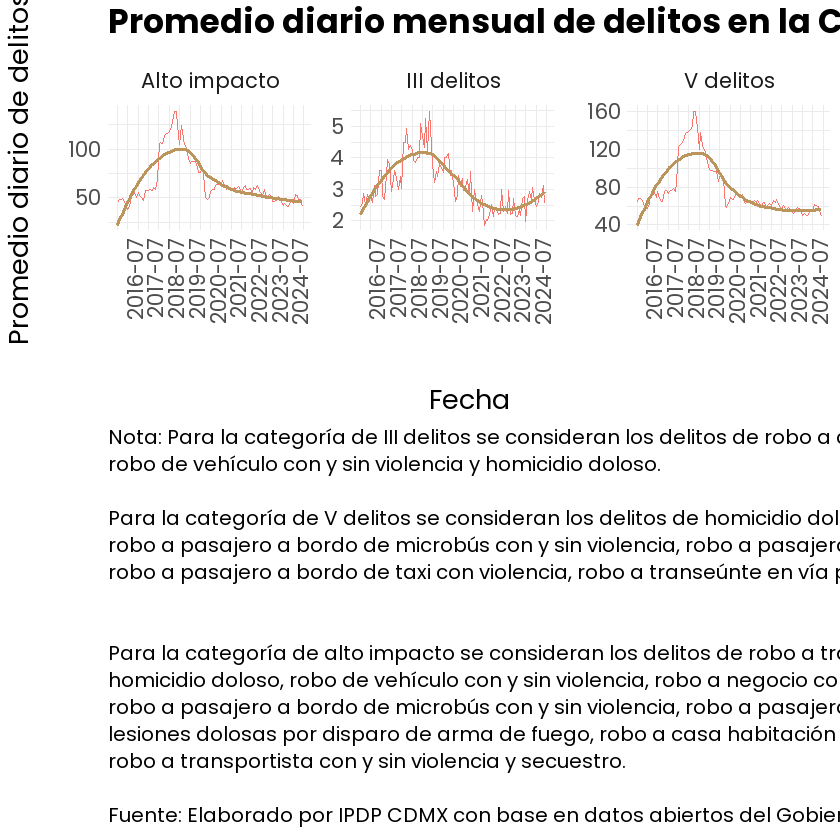

In [10]:
# Gráfica de promedio diario de III y V delitos en una misma gráfica

delitos_mensual %>%
    pivot_longer(cols = c(promedio_diario_III, promedio_diario_V, promedio_diario_alto_impacto), #promedio_diario_perspectiva_genero),
                 names_to = 'delito',
                 values_to = 'promedio_diario') %>%
    select(ano, mes, delito, promedio_diario) %>%
    mutate(delito = recode(delito,
                           promedio_diario_III = "III delitos",
                           promedio_diario_V = "V delitos",
                           promedio_diario_alto_impacto = "Alto impacto"))%>%
                           #promedio_diario_perspectiva_genero = "Perspectiva de género")) %>%
    ggplot(aes(x = as.Date(paste(ano, mes, '01', sep = '-')), y = promedio_diario, color = '#691c32')) +
    geom_line() +
    geom_smooth(method = 'loess', se = FALSE, color = '#bc955c') +
    labs(title = 'Promedio diario mensual de delitos en la Ciudad de México, 2016-2024',
         x = 'Fecha',
         y = 'Promedio diario de delitos',
         caption = "Nota: Para la categoría de III delitos se consideran los delitos de robo a casa habitación con y sin violencia,
robo de vehículo con y sin violencia y homicidio doloso.

Para la categoría de V delitos se consideran los delitos de homicidio doloso, robo a negocio con violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de taxi con violencia, robo a transeúnte en vía pública con y sin violencia y robo de vehículo con y sin violencia.


Para la categoría de alto impacto se consideran los delitos de robo a transeúnte en vía pública con y sin violencia,
homicidio doloso, robo de vehículo con y sin violencia, robo a negocio con violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo de taxi con violencia, violación, robo a repartidor con y sin violencia,
lesiones dolosas por disparo de arma de fuego, robo a casa habitación con violencia, robo a cuentahabiente saliendo del cajero con violencia,
robo a transportista con y sin violencia y secuestro.

Fuente: Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México") +
    theme_minimal() +
    scale_x_date(date_labels = '%Y-%m', date_breaks = '12 months') +
    scale_y_continuous(labels = scales::comma) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0, size = 25, face = "bold"),
          plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
          plot.caption = element_text(hjust = 0, size = 15),
          legend.position = "none",
          text = element_text(family = "pop", size = 20)) +
    facet_wrap(~delito, scales = 'free_y', ncol = 3)

# Salvar gráfica
ggsave('delitos_mensual.png', width = 20, height = 10, units = 'in', dpi = 100, bg = "white")


In [11]:
#Calcular delitos anuales
delitos_anuales <- carpetas %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho)) %>%
#Contabilizar los delitos de III y V delitos por año
    group_by(ano) %>%
    summarise(III_delitos = sum(III_delitos),
                V_delitos = sum(V_delitos),
                alto_impacto = sum(alto_impacto),
                #perspectiva_genero = sum(perspectiva_genero),
                .groups = 'drop')%>%
#Calcular promedio diario anual
    mutate(promedio_diario_III = III_delitos / 365,
           promedio_diario_V = V_delitos / 365,
                promedio_diario_alto_impacto = alto_impacto / 365)%>%
                    #promedio_diario_perspectiva_genero = perspectiva_genero / 365)%>%
#Pegar población
    left_join(pob_cdmx, by = 'ano')%>%
#Calcular tasa de delitos por cada 100,000 habitantes
    mutate(tasa_III = (III_delitos / poblacion_total) * 100000,
           tasa_V = (V_delitos / poblacion_total) * 100000,
                tasa_alto_impacto = (alto_impacto / poblacion_total) * 100000)
                   # tasa_perspectiva_genero = (perspectiva_genero / pob_mujer) * 100000)
delitos_anuales

ano,III_delitos,V_delitos,alto_impacto,promedio_diario_III,promedio_diario_V,promedio_diario_alto_impacto,poblacion_total,pob_mujer,tasa_III,tasa_V,tasa_alto_impacto
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016,1026,24325,17382,2.810959,66.64384,47.62192,6909676,3667544,14.84874,352.0426,251.5603
2017,1217,27056,20784,3.334247,74.12603,56.94247,6991272,3705850,17.40742,386.9968,297.2850
2018,1541,50854,43652,4.221918,139.32603,119.59452,7074976,3745305,21.78099,718.7869,616.9915
2019,1518,39535,34734,4.158904,108.31507,95.16164,7157355,3784450,21.20895,552.3689,485.2910
2020,1258,26713,22725,3.446575,73.18630,62.26027,7197032,3805814,17.47943,371.1669,315.7552
2021,1038,23928,22278,2.843836,65.55616,61.03562,7198885,3810026,14.41890,332.3848,309.4646
2022,831,22751,21474,2.276712,62.33151,58.83288,7222176,3821291,11.50623,315.0159,297.3342
2023,885,20518,18504,2.424658,56.21370,50.69589,7262596,3838867,12.18573,282.5161,254.7849
2024,985,19846,16784,2.698630,54.37260,45.98356,7300177,3854914,13.49282,271.8564,229.9122


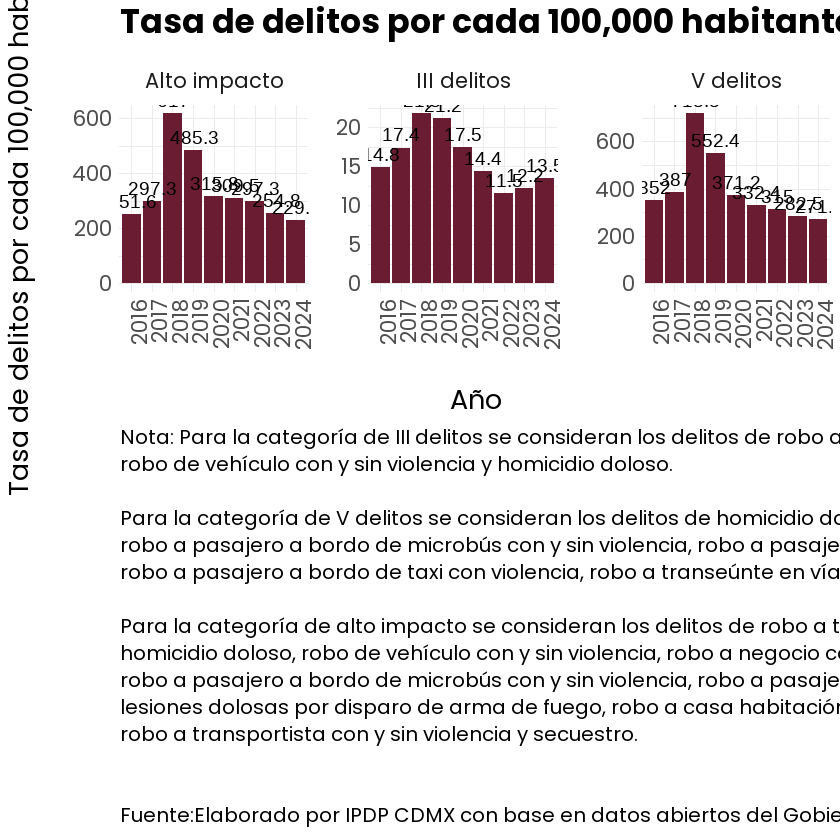

In [12]:
#Gráfica de tasa de delitos por cada 100,000 habitantes
delitos_anuales %>%
    pivot_longer(cols = c(tasa_III, tasa_V, tasa_alto_impacto), #tasa_perspectiva_genero),
                 names_to = 'delito',
                 values_to = 'tasa') %>%
select(ano, delito, tasa) %>%
    mutate(delito = recode(delito,
                            tasa_III = "III delitos",
                            tasa_V = "V delitos",
                            tasa_alto_impacto = "Alto impacto"))%>%
                           # tasa_perspectiva_genero = "Perspectiva de género"))%>%
        ggplot(aes(x = factor(ano), y = tasa)) +
        geom_col(position = 'dodge',fill='#691c32') +
          geom_text(aes(label = round(tasa, 1)),
              position = position_dodge(width = 0.9),
              vjust = -0.5,
              size = 5) +
        facet_wrap(~delito, scales = 'free_y', ncol = 3) +
        labs(title = 'Tasa de delitos por cada 100,000 habitantes en la Ciudad de México, 2016-2024',
             x = 'Año',
             y = 'Tasa de delitos por cada 100,000 habitantes',
             caption="Nota: Para la categoría de III delitos se consideran los delitos de robo a casa habitación con y sin violencia,
robo de vehículo con y sin violencia y homicidio doloso.

Para la categoría de V delitos se consideran los delitos de homicidio doloso, robo a negocio con violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de taxi con violencia, robo a transeúnte en vía pública con y sin violencia y robo de vehículo con y sin violencia.

Para la categoría de alto impacto se consideran los delitos de robo a transeúnte en vía pública con y sin violencia,
homicidio doloso, robo de vehículo con y sin violencia, robo a negocio con violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo de taxi con violencia, violación, robo a repartidor con y sin violencia,
lesiones dolosas por disparo de arma de fuego, robo a casa habitación con violencia, robo a cuentahabiente saliendo del cajero con violencia,
robo a transportista con y sin violencia y secuestro.


Fuente:Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México y CONAPO. Proyecciones de población"
                ) +
            theme_minimal() +
            #scale_fill_manual(values = c("III delitos" = "#235b4e", "V delitos" = "#691c32")) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1),
                plot.title = element_text(hjust = 0, size = 25, face = "bold"),
                plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
                plot.caption = element_text(hjust = 0, size = 15),
                legend.position = "none",
                text = element_text(family = "pop", size = 20))

#Salvar gráfica
ggsave('tasa_delitos.png', width = 20, height = 10
       , units = 'in',,dpi=100,bg="white")

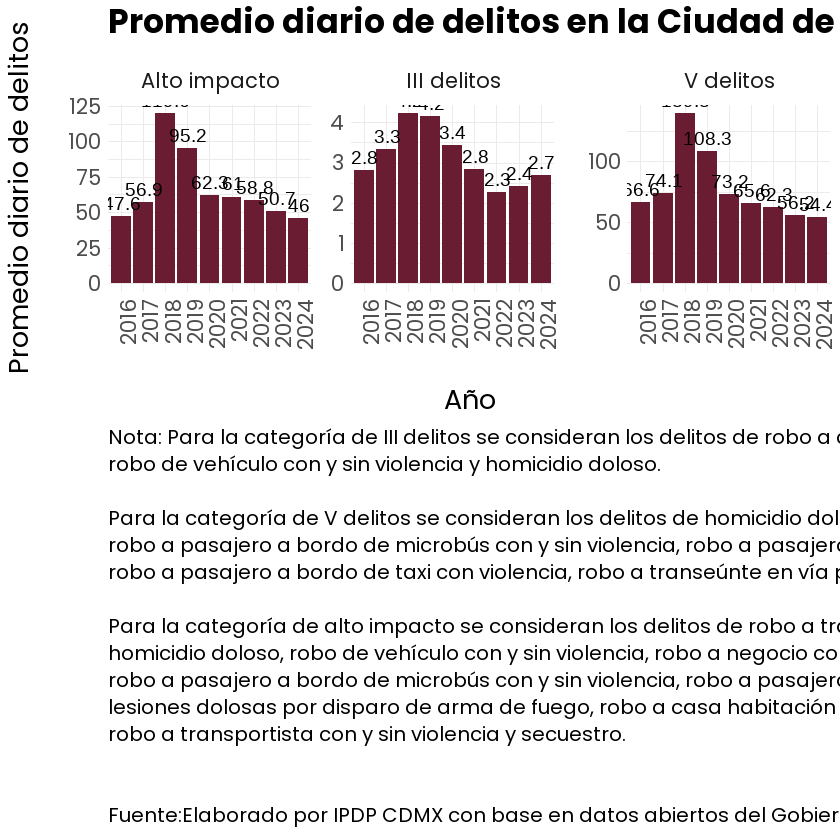

In [13]:
#Gráfica de tasa de delitos por cada 100,000 habitantes
delitos_anuales %>%
    pivot_longer(cols = c(promedio_diario_III, promedio_diario_V, promedio_diario_alto_impacto), #promedio_diario_perspectiva_genero),
                 names_to = 'delito',
                 values_to = 'promedio') %>%
select(ano, delito, promedio) %>%
    mutate(delito = recode(delito,
                            promedio_diario_III = "III delitos",
                            promedio_diario_V = "V delitos",
                            promedio_diario_alto_impacto = "Alto impacto"))%>%
                            #promedio_diario_perspectiva_genero = "Perspectiva de género"))%>%
        ggplot(aes(x = factor(ano), y = promedio)) +
        geom_col(position = 'dodge',fill='#691c32') +
          geom_text(aes(label = round(promedio, 1)),
              position = position_dodge(width = 0.9),
              vjust = -0.5,
              size = 5) +
        facet_wrap(~delito, scales = 'free_y', ncol = 3) +
        labs(title = 'Promedio diario de delitos en la Ciudad de México por año, 2016-2024',
             x = 'Año',
             y = 'Promedio diario de delitos',
             caption="Nota: Para la categoría de III delitos se consideran los delitos de robo a casa habitación con y sin violencia,
robo de vehículo con y sin violencia y homicidio doloso.

Para la categoría de V delitos se consideran los delitos de homicidio doloso, robo a negocio con violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de taxi con violencia, robo a transeúnte en vía pública con y sin violencia y robo de vehículo con y sin violencia.

Para la categoría de alto impacto se consideran los delitos de robo a transeúnte en vía pública con y sin violencia,
homicidio doloso, robo de vehículo con y sin violencia, robo a negocio con violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo de taxi con violencia, violación, robo a repartidor con y sin violencia,
lesiones dolosas por disparo de arma de fuego, robo a casa habitación con violencia, robo a cuentahabiente saliendo del cajero con violencia,
robo a transportista con y sin violencia y secuestro.


Fuente:Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México"
                ) +
            theme_minimal() +
            #scale_fill_manual(values = c("III delitos" = "#235b4e", "V delitos" = "#691c32")) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1),
                plot.title = element_text(hjust = 0, size = 25, face = "bold"),
                plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
                plot.caption = element_text(hjust = 0, size = 15),
                legend.position = "none",
                text = element_text(family = "pop", size = 20))

#Salvar gráfica
ggsave('promedio_diario_anual.png', width = 20, height = 10
       , units = 'in',,dpi=100,bg="white")

In [14]:
##Víctimas en carpetas de investigación
victimas<-read_csv('https://archivo.datos.cdmx.gob.mx/FGJ/victimas/victimasFGJ_acumulado_2024_09.csv')%>%
janitor::clean_names()%>%
#Filtrar mujeres
filter(sexo == 'Femenino',
       tipo_persona=='FISICA',
       alcaldia_hecho != 'FUERA DE CDMX')%>%
#Clasificar delitos con perspectiva de género
mutate(
    perspectiva_genero = case_when(delito %in% c('ABUSO SEXUAL',
                                                 'ACOSO SEXUAL',
                                                 'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES',
                                                 'CONTRA LA INTIMIDAD SEXUAL',
                                                 'FEMINICIDIO',
                                                 'FEMINICIDIO POR ARMA BLANCA',
                                                 'FEMINICIDIO POR DISPARO DE ARMA DE FUEGO',
                                                 'FEMINICIDIO POR GOLPES',
                                                 'HOMICIDIO POR ARMA BLANCA',
                                                 'HOMICIDIO POR ARMA DE FUEGO',
                                                 'HOMICIDIO POR GOLPES',
                                                 'HOMICIDIOS INTENCIONALES (OTROS)',
                                                 'LESIONES INTENCIONALES',
                                                 'LESIONES INTENCIONALES POR ARMA BLANCA',
                                                 'LESIONES INTENCIONALES POR ARMA DE FUEGO',
                                                  'LESIONES INTENCIONALES POR GOLPES',
                                                 'PLAGIO O SECUESTRO',
                                                 'TRATA DE PERSONAS',
                                                 'VIOLACION',
                                                 'VIOLACION EQUIPARADA',
                                                 'VIOLACION EQUIPARADA POR CONOCIDO',
                                                 'VIOLACION TUMULTUARIA',
                                                 'VIOLENCIA FAMILIAR') ~ 1,
                            TRUE ~ 0))%>%
#Dejar solo aquellos que han sido víctimas
  filter(calidad_juridica %in% c(
    'OFENDIDO',
    'VICTIMA Y DENUNCIANTE',
    'VICTIMA',
    'OFENDIDO Y DENUNCIANTE',
    'CADAVER',
    'AGRAVIADO',
    'LESIONADO',
    'DENUNCIANTE Y VICTIMA'
  ))%>%
#Clasificar por delito general
mutate(
    delito_general = case_when(delito %in% c('ABUSO SEXUAL') ~ "ABUSO SEXUAL",
                                delito %in% c('ACOSO SEXUAL', 'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES') ~ "ACOSO SEXUAL",
                                delito %in% c('CONTRA LA INTIMIDAD SEXUAL') ~ "CONTRA LA INTIMIDAD SEXUAL",
                                delito %in% c('FEMINICIDIO', 'FEMINICIDIO POR ARMA BLANCA', 'FEMINICIDIO POR DISPARO DE ARMA DE FUEGO', 'FEMINICIDIO POR GOLPES') ~ "FEMINICIDIO",
                                delito %in% c('HOMICIDIO POR ARMA BLANCA', 'HOMICIDIO POR ARMA DE FUEGO', 'HOMICIDIO POR GOLPES', 'HOMICIDIOS INTENCIONALES (OTROS)') ~ "HOMICIDIO DOLOSO",
                                delito %in% c('LESIONES INTENCIONALES', 'LESIONES INTENCIONALES POR ARMA BLANCA', 'LESIONES INTENCIONALES POR ARMA DE FUEGO', 'LESIONES INTENCIONALES POR GOLPES') ~ "LESIONES DOLOSAS",
                                delito %in% c('PLAGIO O SECUESTRO') ~ "SECUESTRO",
                                delito %in% c('TRATA DE PERSONAS') ~ "TRATA DE PERSONAS",
                                delito %in% c('VIOLACION', 'VIOLACION EQUIPARADA', 'VIOLACION EQUIPARADA POR CONOCIDO', 'VIOLACION TUMULTUARIA') ~ "VIOLACION",
                                delito %in% c('VIOLENCIA FAMILIAR') ~ "VIOLENCIA FAMILIAR",
                                TRUE ~ "OTROS"
    ))



Rows: 1415763 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): mes_inicio, mes_hecho, delito, categoria_delito, sexo, tipo_perso...
dbl   (5): anio_inicio, anio_hecho, edad, latitud, longitud
date  (2): fecha_inicio, fecha_hecho
time  (2): hora_inicio, hora_hecho

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
victimas_mensual <- victimas %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho),
         mes = month(fecha_hecho)) %>%
filter(ano %in% c(2018:2024))%>%
#Contabilizar los delitos por año y mes
    group_by(ano, mes) %>%
    summarise(victimas = sum(perspectiva_genero),
                .groups = 'drop') %>%
#Obtener promedio diario de delitos
    mutate(promedio_diario = victimas / days_in_month(as.Date(paste(ano, mes, '01', sep = '-')))
           )

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


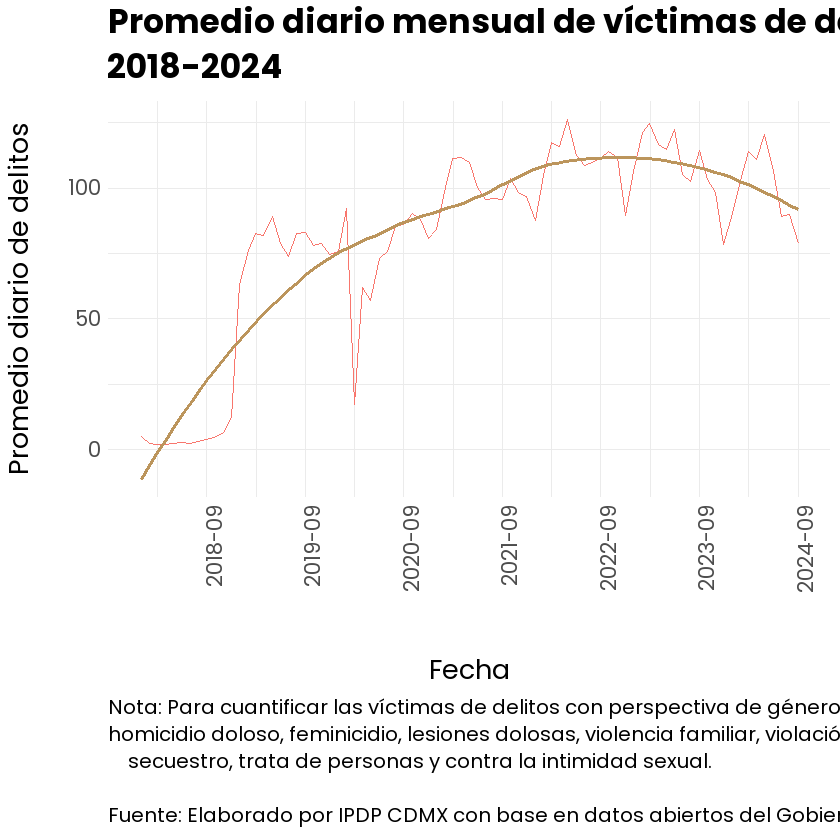

In [16]:
#Gráfica de promedio diario de víctimas de delitos con perspectiva de género
victimas_mensual %>%
    ggplot(aes(x = as.Date(paste(ano, mes, '01', sep = '-')), y = promedio_diario, color = '#691c32')) +
    geom_line() +
    geom_smooth(method = 'loess', se = FALSE, color = '#bc955c') +
labs(title = 'Promedio diario mensual de víctimas de delitos con perspectiva de género en la Ciudad de México,
2018-2024',
         x = 'Fecha',
         y = 'Promedio diario de delitos',
         caption = "Nota: Para cuantificar las víctimas de delitos con perspectiva de género se consideran los delitos de
homicidio doloso, feminicidio, lesiones dolosas, violencia familiar, violación, abuso sexual, acoso sexual,
    secuestro, trata de personas y contra la intimidad sexual.

Fuente: Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México") +
    theme_minimal() +
    scale_x_date(date_labels = '%Y-%m', date_breaks = '12 months') +
    scale_y_continuous(labels = scales::comma) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0, size = 25, face = "bold"),
          plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
          plot.caption = element_text(hjust = 0, size = 15),
          legend.position = "none",
          text = element_text(family = "pop", size = 20))

# Salvar gráfica
ggsave('victimas_mensual.png', width = 18, height = 10, units = 'in', dpi = 100, bg = "white")


In [17]:
victimas_mensual_delitos <- victimas %>%
    mutate(fecha_hecho = as.Date(fecha_hecho),
             ano = year(fecha_hecho),
             mes = month(fecha_hecho)) %>%
    filter(ano %in% c(2018:2024),
              perspectiva_genero == 1)%>%
    group_by(ano, mes, delito_general) %>%
    summarise(victimas = sum(perspectiva_genero),
                .groups = 'drop') %>%
    mutate(promedio_diario = victimas / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))))


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


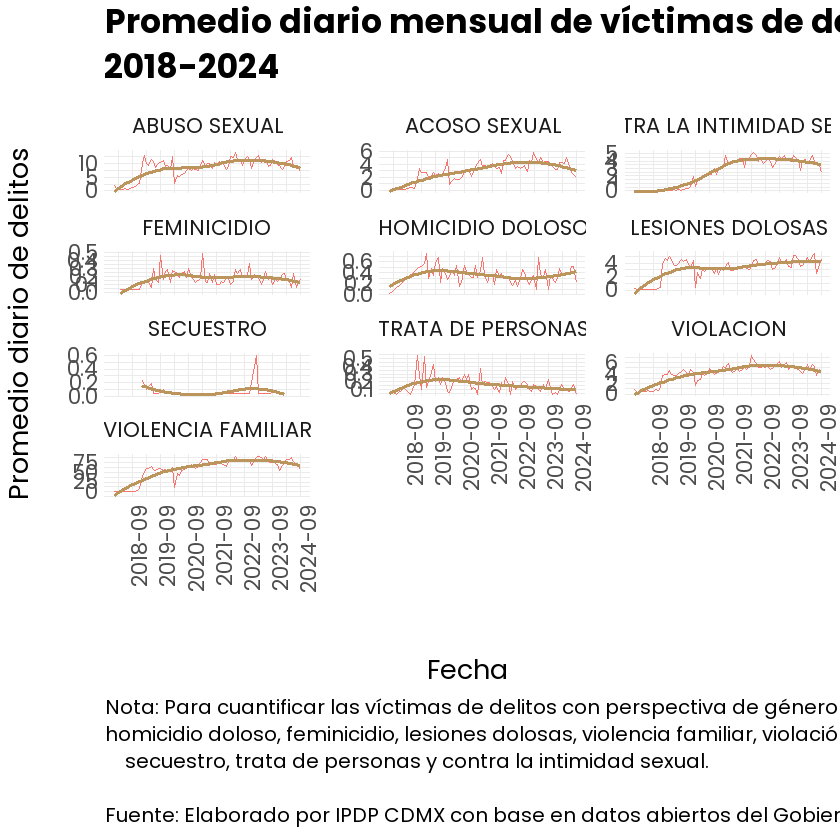

In [18]:
#Gráfica de promedio diario de victimas por facet de delitos
victimas_mensual_delitos %>%
    ggplot(aes(x = as.Date(paste(ano, mes, '01', sep = '-')), y = promedio_diario, color = '#691c32')) +
    geom_line() +
    geom_smooth(method = 'loess', se = FALSE, color = '#bc955c') +
labs(title = 'Promedio diario mensual de víctimas de delitos con perspectiva de género en la Ciudad de México,
2018-2024',
         x = 'Fecha',
         y = 'Promedio diario de delitos',
         caption = "Nota: Para cuantificar las víctimas de delitos con perspectiva de género se consideran los delitos de
homicidio doloso, feminicidio, lesiones dolosas, violencia familiar, violación, abuso sexual, acoso sexual,
    secuestro, trata de personas y contra la intimidad sexual.

Fuente: Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México") +
    theme_minimal() +
    scale_x_date(date_labels = '%Y-%m', date_breaks = '12 months') +
    scale_y_continuous(labels = scales::comma) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0, size = 25, face = "bold"),
          plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
          plot.caption = element_text(hjust = 0, size = 15),
          legend.position = "none",
          text = element_text(family = "pop", size = 20)) +
    facet_wrap(~delito_general, scales = 'free_y', ncol = 3)


# Salvar gráfica
ggsave('victimas_mensual_delitos.png', width = 18, height = 10, units = 'in', dpi = 100, bg = "white")


In [19]:
#Calcular victimas anuales
victimas_anuales <- victimas %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho)) %>%
filter(ano %in% c(2018:2024))%>%
#Contabilizar los delitos de III y V delitos por año
    group_by(ano) %>%
    summarise(victimas = sum(perspectiva_genero),
                .groups = 'drop')%>%
#Calcular promedio diario anual
    mutate(promedio_diario = victimas / 365)
#Calcular tasa de crecimiento de 2021 a 20

victimas_anuales

ano,victimas,promedio_diario
<dbl>,<dbl>,<dbl>
2018,1467,4.019178
2019,28684,78.586301
2020,26861,73.591781
2021,36598,100.268493
2022,39805,109.054795
2023,39750,108.904110
2024,27499,75.339726


In [20]:
#Victimas 2023 por tipo de delito
victimas_anuales_delitos <- victimas %>%
    mutate(fecha_hecho = as.Date(fecha_hecho),
             ano = year(fecha_hecho)) %>%
    filter(ano %in% c(2023),
              perspectiva_genero == 1)%>%
    group_by(ano, delito_general) %>%
    summarise(victimas = sum(perspectiva_genero),
                .groups = 'drop') %>%
    #Porcentaje del total
    mutate(porcentaje =round((victimas/sum(victimas))*100,1))%>%
#Ordenar
    arrange(desc(victimas))%>%
janitor::adorn_totals(where = c("row"))
victimas_anuales_delitos

ano,delito_general,victimas,porcentaje
<chr>,<chr>,<dbl>,<dbl>
2023,VIOLENCIA FAMILIAR,29056,73.1
2023,ABUSO SEXUAL,3904,9.8
2023,VIOLACION,1942,4.9
2023,ACOSO SEXUAL,1608,4.0
2023,CONTRA LA INTIMIDAD SEXUAL,1503,3.8
2023,LESIONES DOLOSAS,1495,3.8
2023,HOMICIDIO DOLOSO,114,0.3
2023,FEMINICIDIO,63,0.2
2023,TRATA DE PERSONAS,41,0.1


#### Indicadores fiscalía

In [37]:
url_encig_basica<-"https://www.inegi.org.mx/contenidos/programas/encig/"
segunda_parte<-"microdatos/encig"

In [38]:
years_encig<-c("2017","2019","2021", "2023")

In [64]:
# Descargar los archivos, descomprimirlos y renombrarlos
for (i in 1:length(years_encig)) {
  # Ajustar el sufijo de la URL y archivo según el año
  if (years_encig[i] %in% c("2017", "2019")) {
    fin <- "_base_datos_dbf.zip"
  } else {
    fin <- "_base_datos_csv.zip"
  }

  # Construir la URL y el nombre del archivo destino
  url <- paste0(url_encig_basica, years_encig[i], "/", segunda_parte, str_sub(years_encig[i], 3, 4), fin)
  print(url)
  destfile <- paste0("data/encig", str_sub(years_encig[i], 3, 4), fin)

  # Descargar el archivo
  download.file(url, destfile = destfile)

  # Descomprimir el archivo
  unzip(destfile, exdir = "data")
}

[1] "https://www.inegi.org.mx/contenidos/programas/encig/2017/microdatos/encig17_base_datos_dbf.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/encig/2019/microdatos/encig19_base_datos_dbf.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/encig/2021/microdatos/encig21_base_datos_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/encig/2023/microdatos/encig23_base_datos_csv.zip"


In [65]:
# Funcion de estimación
process_files <- function(years, variable) {
  # Función anidada para estimar el indicador`
  estima_indicador <- function(path, variable) {
    # Extraer el año del archivo
    year <- substr(path, 11, 14)

    # Leer los datos y hacer las transformaciones necesarias de las variables
    if (year %in% c("2017", "2019")) {
      datos <- foreign::read.dbf(path) %>%
        janitor::clean_names() %>%
mutate(p11_1_22 = as.numeric(p11_1_22),
      fac_p18 = as.numeric(fac_p18),
        upm = as.numeric(upm),
        est_dis = as.numeric(est_dis)) %>%
#Filtrar Ciudad de México
        filter(ent == "09")
    } else if (year %in% c("2021", "2023")) {
      datos <- read_csv(path,show_col_types=FALSE) %>%
        janitor::clean_names() %>%
#Filtrar Ciudad de México
        filter(nom_ent == "CIUDAD DE MEXICO")
    } else {
      stop("Año no soportado.")
    }

    # Diseño muestral
    dm <- datos %>%
      as_survey_design(ids = upm, strata = est_dis, weights = fac_p18)

    # Calidad del agua
    if (variable == "confianza_fiscalia") {
      confianza_f <- dm %>%
mutate(confianza=case_when((p11_1_22==1 | p11_1_22==2) ~ "Confiable",
    TRUE ~ "No confiable"))%>%
        group_by(confianza) %>%
        summarise(
          personas = survey_total(vartype = "cv"),
          porcentaje = survey_prop(vartype = "cv")
        ) %>%
ungroup()%>%
        mutate(porcentaje = round(porcentaje * 100, 2),
              year = year)%>%
filter(confianza=="Confiable")
      return(confianza_f)



##Atención de fugas de agua

    }  else {
      stop("Variable no reconocida.")
    }
  }

  map_dfr(years, function(year) {
    # File path de los archivos
    file_path <- if (year %in% c(2017, 2019)) {
      paste0("data/encig", year, "_01_sec_11.dbf")
    } else if (year %in% c(2021, 2023)) {
      paste0("data/encig", year, "_01_sec_11.csv")
    } else {
      stop("Año no soportado.")
    }

    # Print del archivo que se está procesando
    print(paste("Procesando archivo:", file_path))

    # Invocar la función de estimación
    estima_indicador(file_path, variable)
  })
}

In [66]:
tabla_confianza<-process_files(c(2017,2019,2021,2023), variable = "confianza_fiscalia")
print("Porcentaje de personas de 18 años y más que consideran que la fiscalía es confiable")
tabla_confianza

[1] "Procesando archivo: data/encig2017_01_sec_11.dbf"
[1] "Procesando archivo: data/encig2019_01_sec_11.dbf"
[1] "Procesando archivo: data/encig2021_01_sec_11.csv"


New names:
• `` -> `...1`


[1] "Procesando archivo: data/encig2023_01_sec_11.csv"


New names:
• `` -> `...1`


[1] "Porcentaje de personas de 18 años y más que consideran que el agua de la Ciudad de México es de mala calidad"


confianza,personas,personas_cv,porcentaje,porcentaje_cv,year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Confiable,2076561,0.03882763,23.69,0.03549689,2017
Confiable,1255864,0.03775588,18.10,0.03586557,2019
Confiable,1719723,0.03439213,24.72,0.03185763,2021
Confiable,1992254,0.03049117,26.30,0.02866321,2023


In [2]:
dir.create('data/envipe', showWarnings = FALSE)
url_1 <- 'https://www.inegi.org.mx/contenidos/programas/envipe/'
url_2 <- '/microdatos/bd_envipe_'
years <- c(2020:2024)
data_list <- list()

In [3]:
# Ciclo 1: Descarga y descompresión
for (i in 1:length(years)) {
    if (years[i] %in% c(2024)) {
        fin <- '_csv.zip'
    } else {
        fin <- '_dbf.zip'
    }

    url <- paste0(url_1, years[i], url_2, years[i], fin)
    destfile <- paste0('data/envipe/', years[i], fin)
    folder <- paste0('data/envipe/', years[i])

    dir.create(folder, showWarnings = FALSE)

    tryCatch(
        {
            options(timeout = 9999999)
            download.file(url, destfile, mode = 'wb')
        },
        error = function(e) {
            message('Error en la descarga: ', e)
        }
    )

    unzip_result <- tryCatch(
        {
            unzip(destfile, exdir = folder)
            TRUE
        },
        error = function(e) {
            message('Error en la descompresión: ', e)
            FALSE
        }
    )

    if (unzip_result) {
        print(paste('Archivos descomprimidos para el año', years[i]))

        # Eliminar el archivo ZIP después de la descompresión
        tryCatch(
            {
                file.remove(destfile)
                print(paste('Archivo eliminado:', destfile))
            },
            error = function(e) {
                message('Error al eliminar el archivo:', e)
            }
        )
    }
}


[1] "Archivos descomprimidos para el año 2020"
[1] "Archivo eliminado: data/envipe/2020_dbf.zip"
[1] "Archivos descomprimidos para el año 2021"
[1] "Archivo eliminado: data/envipe/2021_dbf.zip"
[1] "Archivos descomprimidos para el año 2022"
[1] "Archivo eliminado: data/envipe/2022_dbf.zip"
[1] "Archivos descomprimidos para el año 2023"
[1] "Archivo eliminado: data/envipe/2023_dbf.zip"
[1] "Archivos descomprimidos para el año 2024"
[1] "Archivo eliminado: data/envipe/2024_csv.zip"


In [4]:
estima_inseguridad <- function(year, variable) {

# Definir rutas
if  (year %in% c(2020:2021)) {
    ruta_base <- paste0('data/envipe/',year,'/bd_envipe_', year, '_dbf/')
}else {
    ruta_base <- paste0('data/envipe/', year, '/')
}


#Leer datos
if (year %in% c(2020:2023)) {
    seguridad <- read.dbf(paste0(ruta_base, 'TPer_Vic1.dbf'))

} else {
    seguridad <- read_csv(paste0(ruta_base, 'TPer_Vic1.csv'))
}

seguridad<-seguridad%>%
    janitor::clean_names()%>%
    mutate(fac_ele=as.numeric(fac_ele), sexo=as.numeric(sexo))

#Crear diseño muestral
dm<-seguridad%>%
    as_survey_design(
    weights = fac_ele,
    ids = upm_dis,
    strata = est_dis,
    nest = TRUE
    )


  #Estimar percepción de inseguridad de mujeres en la Ciudad de México
    confianza_fgj<-dm %>%
    filter(cve_ent == "09") %>%
filter(ap5_3_06==1)%>%
  mutate(confianza=case_when(
    ap5_4_06 %in% c(1,2) ~ "Confiable",
    TRUE ~ "No confiable")) %>%
  group_by(confianza) %>%
  summarise(
    pob = survey_total(vartype = "cv"),
    porcentaje = survey_prop(vartype = "cv")
  ) %>% mutate(porcentaje = porcentaje * 100)%>%
  filter(confianza== "Confiable")%>%
    mutate(year = year)


  #Estimar percepción de inseguridad de mujeres en la Ciudad de México
    confianza_policia<-dm %>%
    filter(cve_ent == "09") %>%
filter(ap5_3_03==1)%>%
  mutate(confianza=case_when(
    ap5_4_03 %in% c(1,2) ~ "Confiable",
    TRUE ~ "No confiable")) %>%
  group_by(confianza) %>%
  summarise(
    pob = survey_total(vartype = "cv"),
    porcentaje = survey_prop(vartype = "cv")
  ) %>% mutate(porcentaje = porcentaje * 100)%>%
  filter(confianza== "Confiable")%>%
    mutate(year = year)



  # Devolver el resultado basado en la variable
  if (variable == "confianza_fgj") {
    return(confianza_fgj)

  } else if (variable == "confianza_policia") {
    return(confianza_policia)
  }

else {
    stop("Variable no reconocida.")
  }

}

In [6]:
print("Porcentaje de personas de 18 años y más que consideran que la fiscalía es confiable")
tabla_confianza_fgj<-map_dfr(2021:2024, function(year) {
    estima_inseguridad(year, variable = "confianza_fgj")
    })
tabla_confianza_fgj

[1] "Porcentaje de personas de 18 años y más que consideran que la fiscalía es confiable"


New names:
• `` -> `...1`
Rows: 89630 Columns: 232
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (21): ID_VIV, ID_HOG, ID_PER, UPM, VIV_SEL, HOGAR, RESUL_H, R_SEL, AREA...
dbl (211): ...1, SEXO, EDAD, AP4_1, AP4_2_01, AP4_2_02, AP4_2_03, AP4_2_04, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


confianza,pob,pob_cv,porcentaje,porcentaje_cv,year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Confiable,1419285,0.03700267,38.29989,0.02906365,2021
Confiable,1332158,0.03890160,34.67183,0.03262677,2022
Confiable,1512065,0.03589746,38.63385,0.02850885,2023
Confiable,1336158,0.03962655,38.16130,0.03159721,2024


In [9]:
print("Porcentaje de personas de 18 años y más que consideran que la fiscalía es confiable")
tabla_confianza_policia<-map_dfr(2021:2024, function(year) {
    estima_inseguridad(year, variable = "confianza_policia")
    })
tabla_confianza_policia

[1] "Porcentaje de personas de 18 años y más que consideran que la fiscalía es confiable"


New names:
• `` -> `...1`
Rows: 89630 Columns: 232
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (21): ID_VIV, ID_HOG, ID_PER, UPM, VIV_SEL, HOGAR, RESUL_H, R_SEL, AREA...
dbl (211): ...1, SEXO, EDAD, AP4_1, AP4_2_01, AP4_2_02, AP4_2_03, AP4_2_04, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


confianza,pob,pob_cv,porcentaje,porcentaje_cv,year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Confiable,1903384,0.03049709,47.10044,0.02355755,2021
Confiable,2307223,0.02754376,44.18289,0.02222151,2022
Confiable,2405569,0.02715780,44.91095,0.02125973,2023
Confiable,1927437,0.03205645,47.08079,0.02346463,2024


#### Proyecciones

In [23]:
#Promedio diario de 5 delitos

delitos_select <- delitos_anuales %>%
select(ano, promedio_diario_alto_impacto)

delitos_select


ano,promedio_diario_alto_impacto
<dbl>,<dbl>
2016,47.62192
2017,56.94247
2018,119.59452
2019,95.16164
2020,62.26027
2021,61.03562
2022,58.83288
2023,50.69589
2024,45.98356


In [34]:
tcma_delitos<-((delitos_select$promedio_diario_alto_impacto[delitos_select$ano==2023]/delitos_select$promedio_diario_alto_impacto[delitos_select$ano==2020])^(1/(2023-2020))-1)
tcma_delitos

[1] -0.06619991

In [35]:
extendido_delitos<-data.frame(ano=2025:2045)

extendido_delitos$promedio_diario_alto_impacto<-delitos_select$promedio_diario_alto_impacto[delitos_select$ano==2024]*cumprod(rep(1+tcma_delitos,length(2025:2045)))
extendido_delitos%>%
mutate(promedio_diario_alto_impacto=round(promedio_diario_alto_impacto,2))

ano,promedio_diario_alto_impacto
<int>,<dbl>
2025,42.94
2026,40.10
2027,37.44
2028,34.96
2029,32.65
2030,30.49
2031,28.47
2032,26.58
2033,24.82


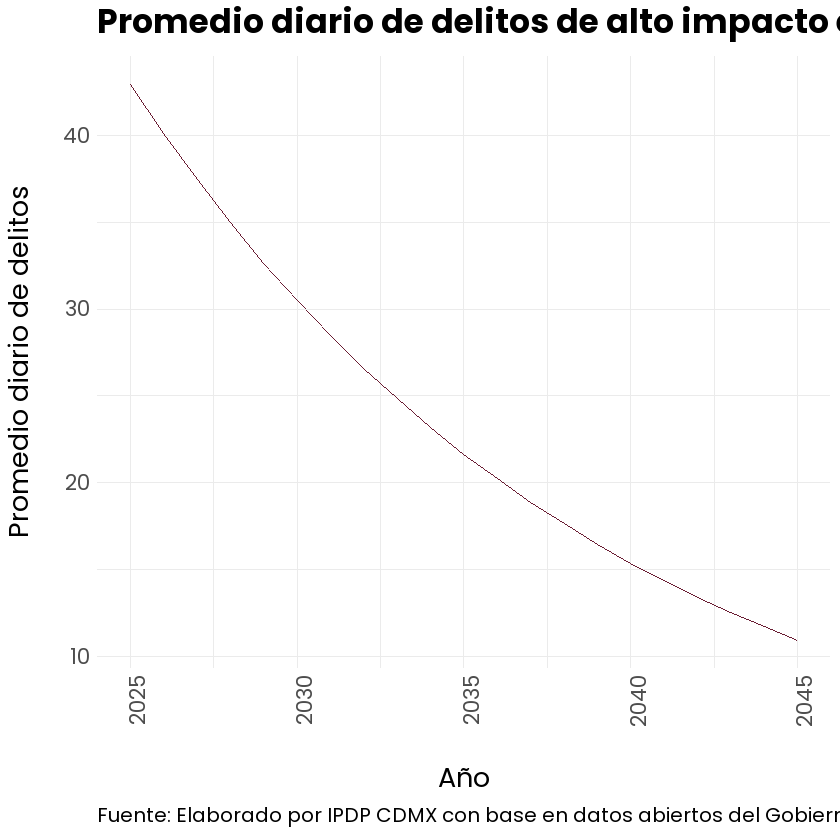

In [36]:
extendido_delitos%>%
ggplot(aes(x=ano,y=promedio_diario_alto_impacto))+
geom_line(color='#691c32')+
labs(title='Promedio diario de delitos de alto impacto en la Ciudad de México, 2025-2045',
     x='Año',
     y='Promedio diario de delitos',
     caption='Fuente: Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México')+theme_minimal()+
theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0, size = 25, face = "bold"),
          plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
          plot.caption = element_text(hjust = 0, size = 15),
          legend.position = "none",
          text = element_text(family = "pop", size = 20))

#### Confianza en fiscalía

In [11]:
tabla_confianza_fgj

confianza,pob,pob_cv,porcentaje,porcentaje_cv,year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Confiable,1419285,0.03700267,38.29989,0.02906365,2021
Confiable,1332158,0.03890160,34.67183,0.03262677,2022
Confiable,1512065,0.03589746,38.63385,0.02850885,2023
Confiable,1336158,0.03962655,38.16130,0.03159721,2024


In [12]:
tcma_confianza_fgj<-((tabla_confianza_fgj$porcentaje[tabla_confianza_fgj$year==2023]/tabla_confianza_fgj$porcentaje[tabla_confianza_fgj$year==2021])^(1/(2023-2021))-1)
tcma_confianza_fgj

[1] 0.004350347

In [13]:
extendido_confianza_fgj<-data.frame(ano=2025:2045)

extendido_confianza_fgj$porcentaje<-tabla_confianza_fgj$porcentaje[tabla_confianza_fgj$year==2024]*cumprod(rep(1+tcma_confianza_fgj,length(2025:2045)))
# Paso 2: Calcular el porcentaje en 2045 según el modelo actual
porcentaje_2045 <- extendido_confianza_fgj$porcentaje[extendido_confianza_fgj$ano == 2045]

# Paso 3: Calcular el factor de ajuste
factor_ajuste <- 50 / porcentaje_2045
factor_ajuste
# Paso 4: Aplicar el factor de ajuste solo a los últimos dos años de la serie
extendido_confianza_fgj$porcentaje[extendido_confianza_fgj$ano >= 2044] <-
    extendido_confianza_fgj$porcentaje[extendido_confianza_fgj$ano >= 2044] * factor_ajuste

# Redondear los resultados
extendido_confianza_fgj %>%
    mutate(porcentaje = round(porcentaje, 2))

[1] 1.196071

ano,porcentaje
<int>,<dbl>
2025,38.33
2026,38.49
2027,38.66
2028,38.83
2029,39.00
2030,39.17
2031,39.34
2032,39.51
2033,39.68


#### Confianza policía

In [16]:
tabla_confianza_policia

confianza,pob,pob_cv,porcentaje,porcentaje_cv,year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Confiable,1903384,0.03049709,47.10044,0.02355755,2021
Confiable,2307223,0.02754376,44.18289,0.02222151,2022
Confiable,2405569,0.02715780,44.91095,0.02125973,2023
Confiable,1927437,0.03205645,47.08079,0.02346463,2024


In [51]:
#Desacelerar la tcma. Se utilizan los valores de 2024 y 2022 pero el período se toma de 2020 a 2024.
#De 2011 a 2024 la confianza en la policía aumentó 15.5 puntos porcentuales: https://www.inegi.org.mx/contenidos/programas/envipe/2024/doc/envipe2024_cdmx.pdf. Se asumen que para 2045, la confianza podría llegar entre 65 y 70%.
tcma_confianza_policia<-((tabla_confianza_policia$porcentaje[tabla_confianza_policia$year==2024]/tabla_confianza_policia$porcentaje[tabla_confianza_policia$year==2022])^(1/(2024-2020))-1)
tcma_confianza_policia

[1] 0.01600863

In [52]:
extendido_confianza_policia<-data.frame(ano=2025:2045)

extendido_confianza_policia$porcentaje<-tabla_confianza_policia$porcentaje[tabla_confianza_policia$year==2024]*cumprod(rep(1+tcma_confianza_policia,length(2025:2045)))
extendido_confianza_policia

ano,porcentaje
<int>,<dbl>
2025,47.83448
2026,48.60025
2027,49.37827
2028,50.16875
2029,50.97188
2030,51.78787
2031,52.61693
2032,53.45925
2033,54.31506
